In [2]:
#Importing Libraries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
%matplotlib  inline
import seaborn as sb

In [3]:
df = pd.read_csv("C:/Users/Lenovo/Desktop/udacity/Internship/AAP/loan.csv")

C:\Users\Lenovo\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [4]:
df.dtypes[:20]

id                       int64
member_id                int64
loan_amnt                int64
funded_amnt              int64
funded_amnt_inv        float64
term                    object
int_rate                object
installment            float64
grade                   object
sub_grade               object
emp_title               object
emp_length              object
home_ownership          object
annual_inc             float64
verification_status     object
issue_d                 object
loan_status             object
pymnt_plan              object
url                     object
desc                    object
dtype: object

In [5]:
df_new = df.filter(['id','grade','sub_grade','annual_inc','loan_amnt','home_ownership','verification_status','emp_length','purpose','addr_state','term','int_rate','loan_status'])

In [6]:
df_new.head()

,id,grade,sub_grade,annual_inc,loan_amnt,home_ownership,verification_status,emp_length,purpose,addr_state,term,int_rate,loan_status
0,1077501,B,B2,24000.0,5000,RENT,Verified,10+ years,credit_card,AZ,36 months,10.65%,Fully Paid
1,1077430,C,C4,30000.0,2500,RENT,Source Verified,< 1 year,car,GA,60 months,15.27%,Charged Off
2,1077175,C,C5,12252.0,2400,RENT,Not Verified,10+ years,small_business,IL,36 months,15.96%,Fully Paid
3,1076863,C,C1,49200.0,10000,RENT,Source Verified,10+ years,other,CA,36 months,13.49%,Fully Paid
4,1075358,B,B5,80000.0,3000,RENT,Source Verified,1 year,other,OR,60 months,12.69%,Current


In [7]:
df_new.shape

(39717, 13)

### Data cleaning and wrangling

In [8]:
df_new.isnull().any()

id                     False
grade                  False
sub_grade              False
annual_inc             False
loan_amnt              False
home_ownership         False
verification_status    False
emp_length              True
purpose                False
addr_state             False
term                   False
int_rate               False
loan_status            False
dtype: bool

In [9]:
#Checking duplicates
sum(df_new['emp_length'].isnull())

1075

In [10]:
#removing duplicates
df_new.dropna(inplace = True)

In [11]:
df_new['emp_length'].shape[0]

38642

In [12]:
#check
df_new.shape

(38642, 13)

In [13]:
#Check
39717 - 1075 ==38642

True

In [14]:
df_new.dtypes

id                       int64
grade                   object
sub_grade               object
annual_inc             float64
loan_amnt                int64
home_ownership          object
verification_status     object
emp_length              object
purpose                 object
addr_state              object
term                    object
int_rate                object
loan_status             object
dtype: object

#### Problem : Loan amount term is in object converting it into integer for easy computation

In [15]:
#Code
df_new['term'] = df_new['term'].str.extract('(\d+)').astype(int) 

In [16]:
#Test
df_new['term'].sample()

27918    60
Name: term, dtype: int32

#### Problem interest rate is in object datatype converting it into int for better computations.

In [17]:
#Code
df_new['int_rate'] = df_new['int_rate'].str.extract('(\d+)').astype(int)

In [18]:
#Test
df_new['int_rate'].sample()

32331    11
Name: int_rate, dtype: int32

#### Problem emp_length is  in object datatype converting it into int for better computations.
- Note:Employment length in years. Possible values are between 0 and 10 where 0 means less than one year and 10 means ten or more years. 

In [19]:
df_new['emp_length'] = df_new['emp_length'].str.extract('(\d+)').astype(int)

In [20]:
# check
df_new['emp_length'].sample()

21336    3
Name: emp_length, dtype: int32

In [21]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 13 columns):
id                     38642 non-null int64
grade                  38642 non-null object
sub_grade              38642 non-null object
annual_inc             38642 non-null float64
loan_amnt              38642 non-null int64
home_ownership         38642 non-null object
verification_status    38642 non-null object
emp_length             38642 non-null int32
purpose                38642 non-null object
addr_state             38642 non-null object
term                   38642 non-null int32
int_rate               38642 non-null int32
loan_status            38642 non-null object
dtypes: float64(1), int32(3), int64(2), object(7)
memory usage: 3.7+ MB


**Data is now perfectly ready for performing analysis**

# Data analysis

### Univariate EDA

In [22]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 38642 entries, 0 to 39716
Data columns (total 13 columns):
id                     38642 non-null int64
grade                  38642 non-null object
sub_grade              38642 non-null object
annual_inc             38642 non-null float64
loan_amnt              38642 non-null int64
home_ownership         38642 non-null object
verification_status    38642 non-null object
emp_length             38642 non-null int32
purpose                38642 non-null object
addr_state             38642 non-null object
term                   38642 non-null int32
int_rate               38642 non-null int32
loan_status            38642 non-null object
dtypes: float64(1), int32(3), int64(2), object(7)
memory usage: 3.7+ MB


In [23]:
df_new['grade'].value_counts(normalize = True)

B    0.302417
A    0.250893
C    0.205114
D    0.134439
E    0.072331
F    0.026655
G    0.008152
Name: grade, dtype: float64

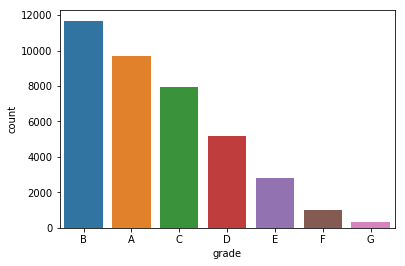

In [24]:
sb.countplot(df_new['grade'],order =  df_new.grade.value_counts().index );

In [25]:
#Subgrade
df.sub_grade.value_counts()

B3    2917
A4    2886
A5    2742
B5    2704
B4    2512
C1    2136
B2    2057
C2    2011
B1    1830
A3    1810
C3    1529
A2    1508
D2    1348
C4    1236
C5    1186
D3    1173
A1    1139
D4     981
D1     931
D5     874
E1     763
E2     656
E3     553
E4     454
E5     416
F1     329
F2     249
F3     185
F4     168
F5     118
G1     104
G2      78
G4      56
G3      48
G5      30
Name: sub_grade, dtype: int64

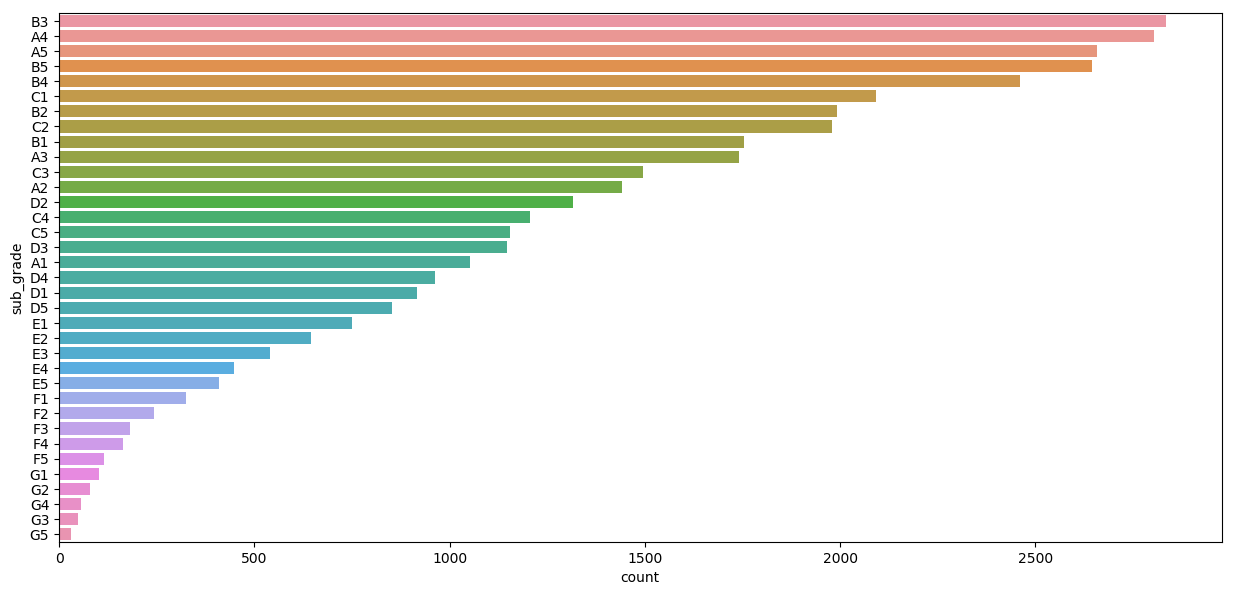

In [26]:
plt.figure(figsize=(15,7),dpi=100)
base_color = sb.color_palette()[0]
sb.countplot(y = df_new['sub_grade'] , order = df_new.sub_grade.value_counts().index);



(0, 200000)

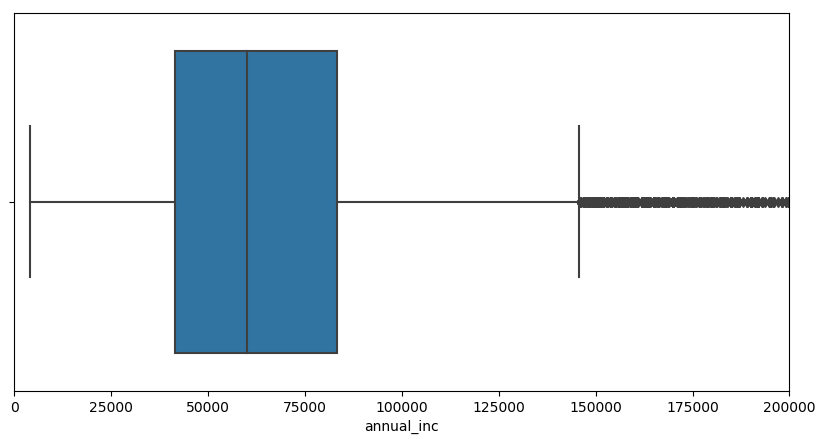

In [27]:
#annual income
plt.figure(figsize=(10,5),dpi=100)
sb.boxplot(df_new['annual_inc'])
plt.xlim(0,200000)

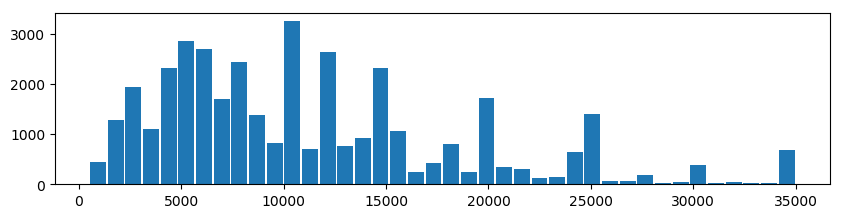

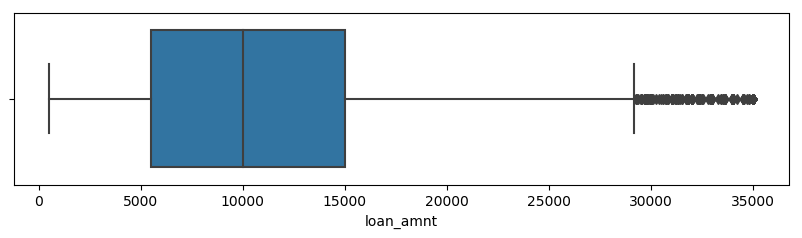

In [28]:
#for loan amount
from matplotlib.pyplot import figure

plt.figure(figsize=(10,5),dpi=100)
plt.subplot(2,1,1)
plt.hist(df_new['loan_amnt'],rwidth=0.9,bins=40)
plt.show()

plt.figure(figsize=(10,5),dpi=100)
plt.subplot(2,1,2)
sb.boxplot(df_new['loan_amnt'])
plt.show()

### 1/4th of data lies between 500 Rs to 5500 Rs and 15000 Rs to 29000 Rs and most of the data lies between 5500Rs to 15000Rs.
- Mean - 11,291.61
- Mode - 10,000

In [29]:
df_new['loan_amnt'].min()

500

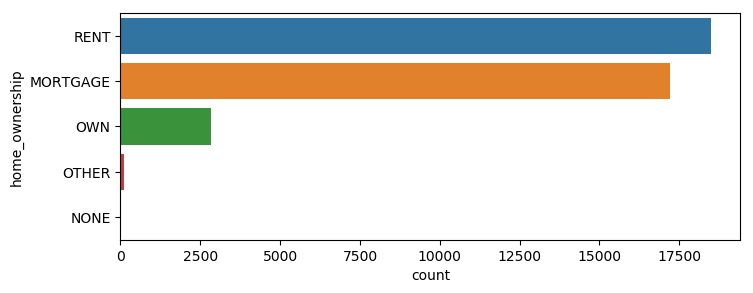

In [30]:
# Home Ownership
plt.figure(figsize=(8,3),dpi=100)
sb.countplot( y = df_new['home_ownership'], order = df_new['home_ownership'].value_counts().index[:])

In [31]:
df_new['home_ownership'].value_counts(normalize = True)

RENT        0.478443
MORTGAGE    0.445422
OWN         0.073521
OTHER       0.002536
NONE        0.000078
Name: home_ownership, dtype: float64

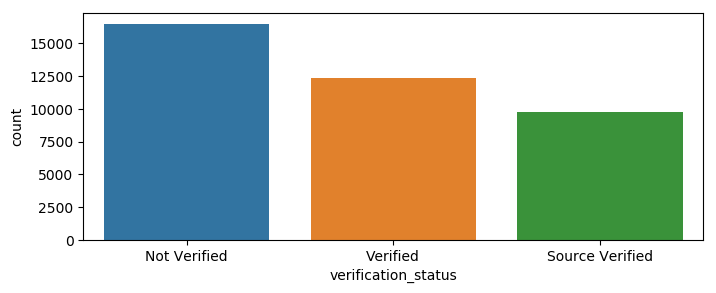

In [32]:
plt.figure(figsize=(8,3),dpi=100)
sb.countplot(df_new['verification_status'] , order = df_new['verification_status'].value_counts().index)

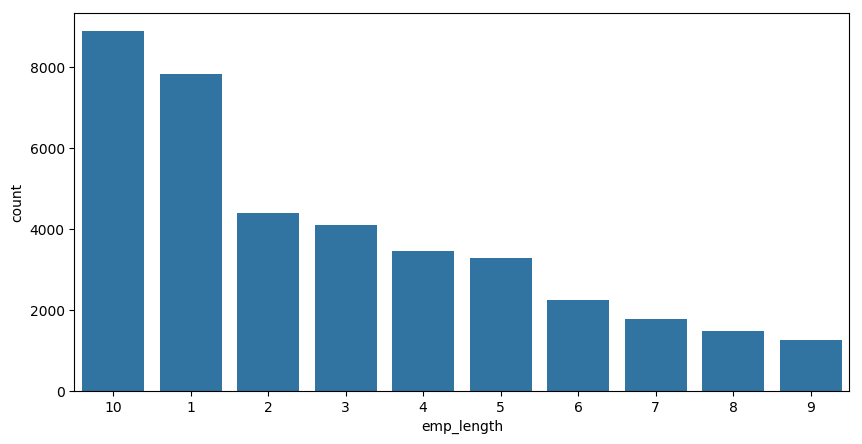

In [33]:
#emp length
plt.figure(figsize=(10,5),dpi=100)
base_color = sb.color_palette()[0]
sb.countplot(df_new['emp_length'],color = base_color, order = df_new['emp_length'].value_counts().index)

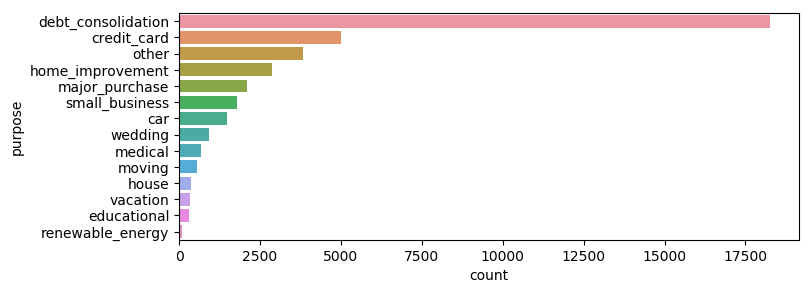

In [34]:
# Purpose
plt.figure(figsize=(8,3),dpi=100)
sb.countplot(y = df_new['purpose'], order = df_new['purpose'].value_counts().index);

In [35]:
df_new['addr_state'].value_counts()

CA    6911
NY    3709
FL    2776
TX    2672
NJ    1825
IL    1488
PA    1483
VA    1378
GA    1357
MA    1310
OH    1190
MD    1030
AZ     834
WA     805
CO     770
NC     761
CT     731
MI     686
MO     662
MN     593
NV     482
SC     464
WI     446
OR     437
AL     434
LA     426
KY     321
OK     293
KS     260
UT     252
AR     236
DC     214
RI     196
NM     183
HI     170
WV     168
NH     161
DE     111
WY      79
MT      79
AK      78
SD      63
VT      54
MS      19
TN      17
IN       9
ID       6
IA       5
NE       5
ME       3
Name: addr_state, dtype: int64

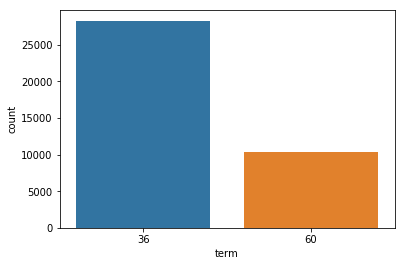

In [36]:
# Term
sb.countplot(df_new['term'])

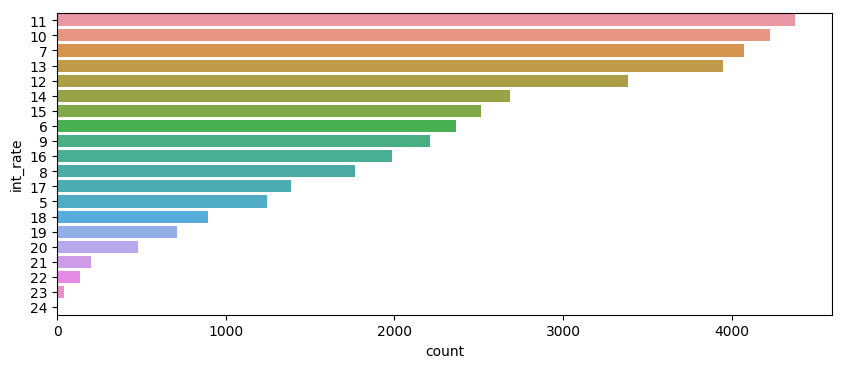

In [37]:
#Interest rate
plt.figure(figsize=(10,4),dpi=100)
sb.countplot( y = df_new['int_rate'], order = df_new['int_rate'].value_counts().index)

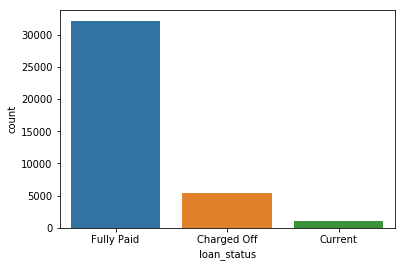

In [38]:
sb.countplot(df_new['loan_status'])

## Bivariate Exploratory Data Analysis

#### Focusing More on Loan status : Charged off

In [39]:
defaulted = df_new[df_new['loan_status'] == "Charged Off"]

In [40]:
defaulted.head()

,id,grade,sub_grade,annual_inc,loan_amnt,home_ownership,verification_status,emp_length,purpose,addr_state,term,int_rate,loan_status
1,1077430,C,C4,30000.0,2500,RENT,Source Verified,1,car,GA,60,15,Charged Off
8,1071795,F,F2,40000.0,5600,OWN,Source Verified,4,small_business,CA,60,21,Charged Off
9,1071570,B,B5,15000.0,5375,RENT,Verified,1,other,TX,60,12,Charged Off
12,1064687,C,C1,30000.0,9000,RENT,Source Verified,1,debt_consolidation,VA,36,13,Charged Off
14,1069057,B,B2,100000.0,10000,RENT,Source Verified,3,other,CA,36,10,Charged Off


In [41]:
defaulted.describe()

,id,annual_inc,loan_amnt,emp_length,term,int_rate
count,5.399000e+03,5.399000e+03,5399.000000,5399.000000,5399.000000,5399.000000
mean,6.955903e+05,6.333111e+04,12244.077607,5.199296,46.339693,13.323578
std,2.173751e+05,4.810356e+04,8086.515636,3.445429,11.885687,3.685831
min,6.141900e+04,4.080000e+03,900.000000,1.000000,36.000000,5.000000
25%,5.273770e+05,3.824467e+04,6000.000000,2.000000,36.000000,11.000000
50%,6.961880e+05,5.400000e+04,10000.000000,5.000000,36.000000,13.000000
75%,8.535225e+05,7.500000e+04,17000.000000,9.000000,60.000000,16.000000
max,1.077430e+06,1.250000e+06,35000.000000,10.000000,60.000000,24.000000


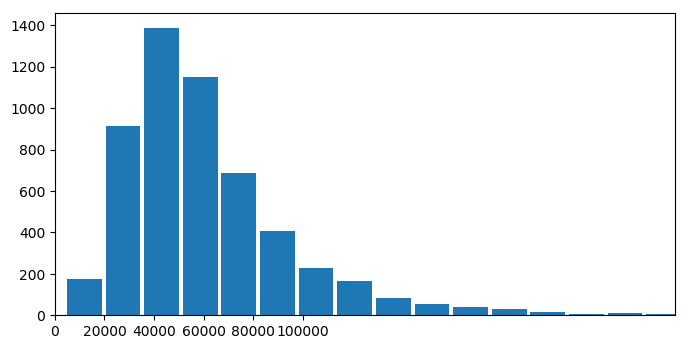

In [42]:
#sb.distplot(defaulted['annual_inc'])
plt.figure(figsize=(8,4),dpi=100)
plt.hist(defaulted['annual_inc'],rwidth=0.9,bins=80)
plt.xlim(0,250000)
plt.xticks([0,20000,40000,60000,80000,100000])
plt.show()

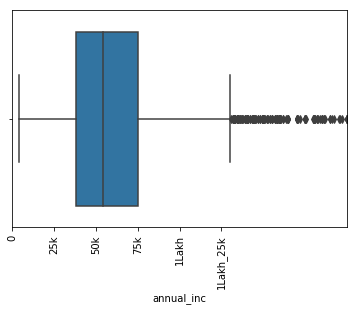

In [43]:
#ANNUAL INCOME
sb.boxplot(defaulted['annual_inc'])
plt.xlim(0,200000);
plt.xticks([0,25000,50000,75000,100000,125000,],['0','25k','50k','75k','1Lakh','1Lakh_25k'],rotation = 90);

In [44]:
#More accuracte
from numpy import percentile
from numpy.random import rand
# generate data sample
data = defaulted['annual_inc']
# calculate quartiles
quartiles = percentile(data, [25, 50, 75])
# calculate min/max
data_min, data_max = data.min(), data.max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 4080.000
Q1: 38244.665
Median: 54000.000
Q3: 75000.000
Max: 1250000.000


### Result  :
- 50% of the data lies within 38,244Rs and 75,000Rs i.e ***Loan id which has approx annual_inc between 38k to 75k to 82k fail to pay the loan***

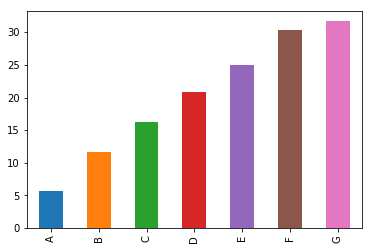

In [45]:
# For Grade
(defaulted.grade.value_counts(sort = True) * 100/df_new.grade.value_counts(sort = True)).plot.bar()

In [46]:
defaulted.grade.value_counts(sort = True) *100 /df_new.grade.value_counts(sort = True)

A     5.755544
B    11.595071
C    16.250315
D    20.885467
E    25.044723
F    30.388350
G    31.746032
Name: grade, dtype: float64

### Results :
- Grade G has failed to repay the loan 100 times out of 315 times i.e 31.74 percent out of 100 percent.
- Grade F has failed to repay the loan 313 times out of 1030 times i.e 30.88 times out of 100 percent.
- *** There is higher chances that if the Loan is given to the grades i.e G and F it will be defaulted ***

In [47]:
defaulted.head()

,id,grade,sub_grade,annual_inc,loan_amnt,home_ownership,verification_status,emp_length,purpose,addr_state,term,int_rate,loan_status
1,1077430,C,C4,30000.0,2500,RENT,Source Verified,1,car,GA,60,15,Charged Off
8,1071795,F,F2,40000.0,5600,OWN,Source Verified,4,small_business,CA,60,21,Charged Off
9,1071570,B,B5,15000.0,5375,RENT,Verified,1,other,TX,60,12,Charged Off
12,1064687,C,C1,30000.0,9000,RENT,Source Verified,1,debt_consolidation,VA,36,13,Charged Off
14,1069057,B,B2,100000.0,10000,RENT,Source Verified,3,other,CA,36,10,Charged Off


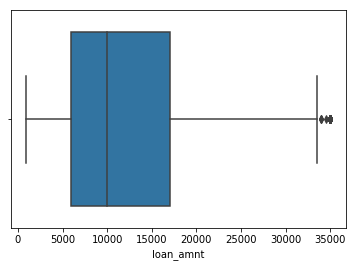

In [48]:
sb.boxplot(defaulted['loan_amnt']);

In [49]:
#More accuracte
from numpy import percentile
from numpy.random import rand
# generate data sample
data = defaulted['loan_amnt']
# calculate quartiles
quartiles = percentile(data, [25, 50, 75])
# calculate min/max
data_min, data_max = data.min(), data.max()
# print 5-number summary
print('Min: %.3f' % data_min)
print('Q1: %.3f' % quartiles[0])
print('Median: %.3f' % quartiles[1])
print('Q3: %.3f' % quartiles[2])
print('Max: %.3f' % data_max)

Min: 900.000
Q1: 6000.000
Median: 10000.000
Q3: 17000.000
Max: 35000.000


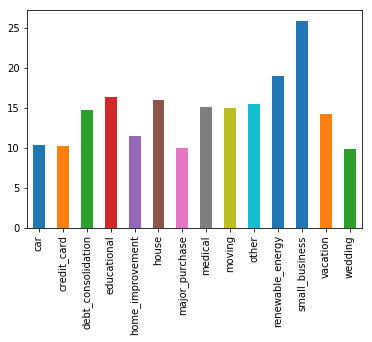

In [50]:
# For Purpose
(defaulted.purpose.value_counts(sort = True) * 100/df_new.purpose.value_counts(sort = True)).plot.bar()

In [51]:
# defaulted.purpose.value_counts(sort= True) *100 /
df_new.purpose.value_counts()

debt_consolidation    18242
credit_card            5000
other                  3833
home_improvement       2879
major_purchase         2115
small_business         1783
car                    1497
wedding                 934
medical                 668
moving                  559
house                   368
vacation                352
educational             317
renewable_energy         95
Name: purpose, dtype: int64

### Results :
#### Top Purpose on which loan is defaulted.
1. Small business Loan : Out of 1782 Loan_Id ,462 Loan is defaulted i.e 25.9% ~ 30% loan is in defaulted out of 100 percent
2. Renewable Energy : Out of 95 loan_id , 18 loan_id is defaulted i.e 18.9% ~ 19%
3. House Loan : Out of 368 Loan_Id ,59 Loan_Id is defaulted i.e 16.03%
4. Educational Loan:Out of 317 Loan_Id , 52 Loan_Id is defaulted  i.e 16.4% 

In [52]:
defaulted.head()

,id,grade,sub_grade,annual_inc,loan_amnt,home_ownership,verification_status,emp_length,purpose,addr_state,term,int_rate,loan_status
1,1077430,C,C4,30000.0,2500,RENT,Source Verified,1,car,GA,60,15,Charged Off
8,1071795,F,F2,40000.0,5600,OWN,Source Verified,4,small_business,CA,60,21,Charged Off
9,1071570,B,B5,15000.0,5375,RENT,Verified,1,other,TX,60,12,Charged Off
12,1064687,C,C1,30000.0,9000,RENT,Source Verified,1,debt_consolidation,VA,36,13,Charged Off
14,1069057,B,B2,100000.0,10000,RENT,Source Verified,3,other,CA,36,10,Charged Off


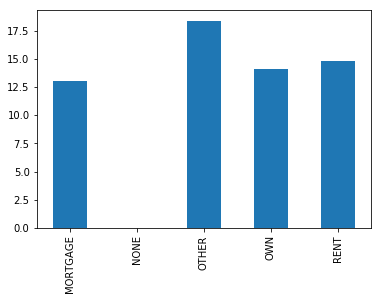

In [53]:
# For Home_Ownership
base_color = sb.color_palette()[0]
(defaulted.home_ownership.value_counts(sort = True) * 100/df_new.home_ownership.value_counts(sort = True)).plot(kind = 'bar' , color= base_color);

In [54]:
defaulted.home_ownership.value_counts(sort = True)  * 100/df_new.home_ownership.value_counts(sort = True)

MORTGAGE    13.043226
NONE              NaN
OTHER       18.367347
OWN         14.079549
RENT        14.798788
Name: home_ownership, dtype: float64

### Results :
#### Top Home Status which failed to pay Loan
- Home Ownership which is **Other**  has failed to pay loan 2736 time out of 18488 i.e ***18.36%*** out of 100%.
- Home Ownership which is **Rent** has failed to pay loan 2736 times out of 18488 i.e ***14.79%*** out of 100%.

Text(0,0.5,'In Percetage')

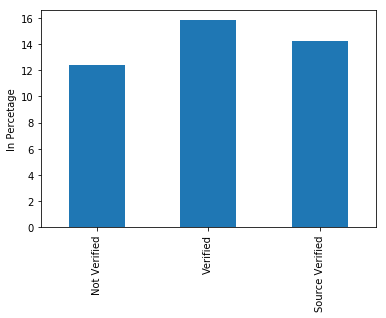

In [55]:
# For Verification Status
base_color = sb.color_palette()[0]
(defaulted.verification_status.value_counts(sort = True) * 100/df_new.verification_status.value_counts(sort = True)).plot(kind = 'bar',color = base_color)
plt.ylabel("In Percetage")

In [56]:
defaulted.verification_status.value_counts(sort = True) * 100/ df_new.verification_status.value_counts(sort = True)

Not Verified       12.419687
Verified           15.818020
Source Verified    14.257992
Name: verification_status, dtype: float64

### Results :
#### Verification status Details :
- **Verified :**  Total-12353 ,Defaulted - 1954 i.e ***15.81% Defaulted out of 100%***
- **Source Verified :**  Total- 9791 , Defaulted - 1396 i.e ***14.25% Defaulted out of 100%***
- **Not Verified :**  Total-16498 , Defaulted - 2049 i.e ***12.41% Defaulted out of 100%***

In [112]:
#For emp_length
defaulted.emp_length.value_counts(sort = True) * 100/ df_new.emp_length.value_counts(sort = True)

10    14.990427
1     13.997188
2     12.921604
3     13.553114
4     13.445867
5     13.954906
6     13.772992
7     14.833615
8     13.725490
9     12.559618
Name: emp_length, dtype: float64

### Results :
#### Emp_length Details :
- **Emp_length: >10**  Total-8879 ,Defaulted - 1331 i.e ***14.99% ~ 15% Defaulted out of 100%***
- **Emp_length: 7**  Total- 1773 , Defaulted - 263 i.e ***14.83% Defaulted out of 100%***
- **Emp_length: 1**  Total-7823 , Defaulted - 1095 i.e ***13.99% Defaulted out of 100%***
#### This is not a strong variable to predict whether or not Loan ID will be defaullted

In [115]:
defaulted.head()

,id,grade,sub_grade,annual_inc,loan_amnt,home_ownership,verification_status,emp_length,purpose,addr_state,term,int_rate,loan_status
1,1077430,C,C4,30000.0,2500,RENT,Source Verified,1,car,GA,60,15,Charged Off
8,1071795,F,F2,40000.0,5600,OWN,Source Verified,4,small_business,CA,60,21,Charged Off
9,1071570,B,B5,15000.0,5375,RENT,Verified,1,other,TX,60,12,Charged Off
12,1064687,C,C1,30000.0,9000,RENT,Source Verified,1,debt_consolidation,VA,36,13,Charged Off
14,1069057,B,B2,100000.0,10000,RENT,Source Verified,3,other,CA,36,10,Charged Off


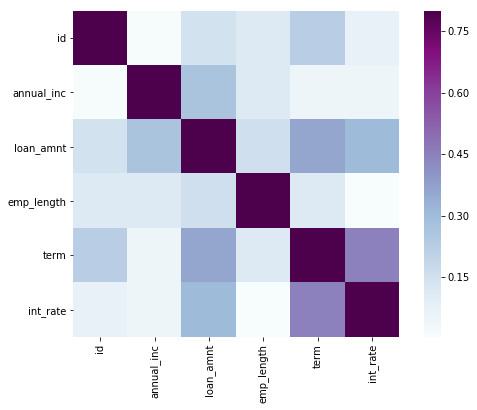

In [122]:
matrix = df_new.corr() 
f, ax = plt.subplots(figsize=(9, 6)) 
sb.heatmap(matrix, vmax=.8, square=True, cmap="BuPu");

#### We see that there is a strong coreleation between the variables "
- ***Interest Rate and Term***
- ***Loan Amount and Term***
- ***loan Amount and Interest Rate***

# Findings :

##### About Annual Income :
- 50% of the data lies within 38,244Rs and 75,000Rs i.e ***Loan id which has annual_income approx between 38k to 75k  fail to pay the loan***

##### About Grades :
- Grade G has failed to repay the loan 100 times out of 315 times i.e 31.74 percent out of 100 percent.
- Grade F has failed to repay the loan 313 times out of 1030 times i.e 30.88 times out of 100 percent.
- *** There is higher chances that if the Loan is given to the grades i.e G and F it will be defaulted ***

#### Top Purpose on which loan is defaulted.
1. Small business Loan : Out of 1782 Loan_Id ,462 Loan is defaulted i.e 25.9% ~ 30% loan is in defaulted out of 100 percent
2. Renewable Energy : Out of 95 loan_id , 18 loan_id is defaulted i.e 18.9% ~ 19%
3. House Loan : Out of 368 Loan_Id ,59 Loan_Id is defaulted i.e 16.03%
4. Educational Loan:Out of 317 Loan_Id , 52 Loan_Id is defaulted  i.e 16.4% 

#### Top Home Status which failed to pay Loan
- Home Ownership which is **Other**  has failed to pay loan 2736 time out of 18488 i.e ***18.36%*** out of 100%.
- Home Ownership which is **Rent** has failed to pay loan 2736 times out of 18488 i.e ***14.79%*** out of 100%.

#### Emp_length Details :
- **Emp_length: >10**  Total-8879 ,Defaulted - 1331 i.e ***14.99% ~ 15% Defaulted out of 100%***
- **Emp_length: 7**  Total- 1773 , Defaulted - 263 i.e ***14.83% Defaulted out of 100%***
- **Emp_length: 1**  Total-7823 , Defaulted - 1095 i.e ***13.99% Defaulted out of 100%***
#### This is not a strong variable to predict whether or not Loan ID will be defaullted

